In [6]:
import platform
import numpy as np
import pandas as pd

print(platform.machine())
print(platform.python_version())
print(np.version.version)
print(pd.__version__)

AMD64
3.11.0
1.23.5
1.5.2


In [3]:
print(platform.uname())

uname_result(system='Windows', node='commi', release='10', version='10.0.19042', machine='AMD64')


# Разрядность типов данных

In [152]:
s2 = pd.Series([200,300,400,500,11,22,33,44,55], index=['a', 'b', 'c', 'd', 'e', 'f', 'k', 'm', 's'])
s2

a    200
b    300
    ... 
m     44
s     55
Length: 9, dtype: int64

In [154]:
s2 = pd.Series(np.array([200,300,400,500,11,22,33,44,55]))
s.dtypes

dtype('int64')

In [153]:
a = np.array([200,300,400,500,11,22,33,44,55])
a.dtype

dtype('int32')

In [155]:
pd.Series(a)

0    200
1    300
    ... 
7     44
8     55
Length: 9, dtype: int32

In [9]:
s = pd.Series([99, 88, 77])
s.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3 entries, 0 to 2
Series name: None
Non-Null Count  Dtype
--------------  -----
3 non-null      int64
dtypes: int64(1)
memory usage: 152.0 bytes


In [10]:
a = np.array([99, 88, 77])
s = pd.Series(a)
s.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3 entries, 0 to 2
Series name: None
Non-Null Count  Dtype
--------------  -----
3 non-null      int32
dtypes: int32(1)
memory usage: 140.0 bytes


# Матанализ

In [6]:
from matplotlib import pyplot as plt
import math
print('Done')

Done


([-0.99,
  -0.9501,
  -0.9101999999999999,
  -0.8702999999999999,
  -0.8303999999999998,
  -0.7904999999999998,
  -0.7505999999999997,
  -0.7106999999999997,
  -0.6707999999999996,
  -0.6308999999999996,
  -0.5909999999999995,
  -0.5510999999999995,
  -0.5111999999999994,
  -0.47129999999999944,
  -0.43139999999999945,
  -0.39149999999999946,
  -0.35159999999999947,
  -0.3116999999999995,
  -0.2717999999999995,
  -0.2318999999999995,
  -0.1919999999999995,
  -0.1520999999999995,
  -0.11219999999999951,
  -0.0722999999999995,
  -0.0323999999999995,
  0.007500000000000506,
  0.04740000000000051,
  0.08730000000000052,
  0.12720000000000053,
  0.16710000000000053,
  0.20700000000000052,
  0.2469000000000005,
  0.2868000000000005,
  0.3267000000000005,
  0.3666000000000005,
  0.40650000000000047,
  0.44640000000000046,
  0.48630000000000045,
  0.5262000000000004,
  0.5661000000000005,
  0.6060000000000005,
  0.6459000000000006,
  0.6858000000000006,
  0.7257000000000007,
  0.76560000000000

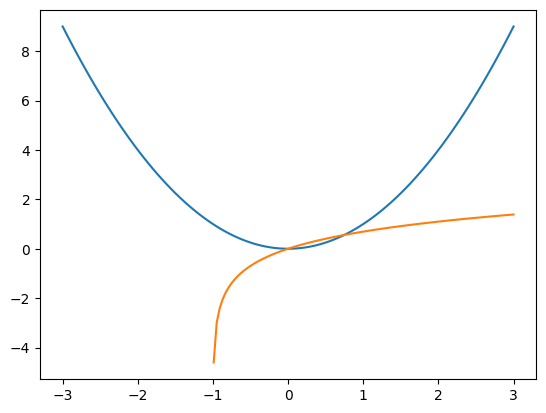

In [7]:
def f(x):
    x = x**2
    return x

def g(x):
    import math
    return math.log(x+1)

def simple_drawer(x_left, x_right, N, func):
    from matplotlib import pyplot as plt
    xs = list()
    fx = list()
    x = x_left
    for i in range(N+1):
        xs.append(x)
        fx.append(func(x))
        x+=((x_right - x_left) / N)
    plt.plot(xs, fx)
    return xs, fx

simple_drawer(-3, 3, 100, f)
simple_drawer(-0.99, 3, 100, g)

Сравним численную функцию и ее прозводную - насколько расчетная будет приближаться к производной в зависимости от уменьшения dx

In [8]:
# оригинальная функция
def f(x):
    import math
    return x**2 + math.sin(x) - math.log(1+x)

# производная функция
def g(x):
    import math
    return 2*x + math.cos(x) - 1/(1+x)
print('Correct')

Correct


In [9]:
def g_numerical(x, delta):
    """
    Формула расчета производной в данной точке при фиксированной dx
    """
    return (f(x+delta) - f(x))/delta

Numerical x=0, g(x)= 0.1452323684250323
Analytical x=0, g(x)= 0.0
Numerical x=100, g(x)= 200.97628349123625
Analytical x=100, g(x)= 200.8524178821887


In [15]:
# Проверим в точке х = 0
delta = 0.5
x = 0
print('Numerical x=0, g(x)=', g_numerical(x, delta))
print('Analytical x=0, g(x)=', g(x))

# Проверим в точке х = 100
x = 100
print('Numerical x=100, g(x)=', g_numerical(x, delta))
print('Analytical x=100, g(x)=', g(x))

Numerical x=0, g(x)= 0.6479208609920772
Analytical x=0, g(x)= 0.0
Numerical x=100, g(x)= 201.44093478536888
Analytical x=100, g(x)= 200.8524178821887


При уменьшении `delta` разность отличается.

Нарисуем график функции аналитической производной и посчитанной:

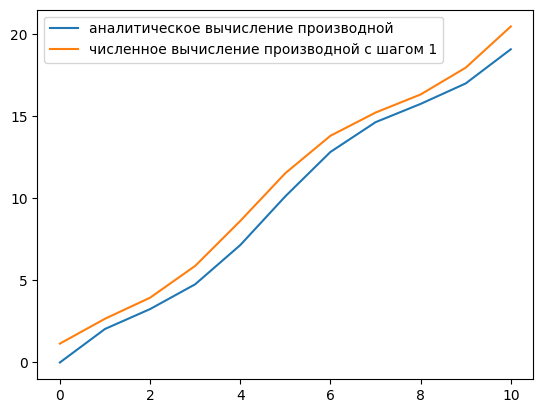

In [16]:
delta = 1
x_left = 0
x_right = 10
N = int((x_right - x_left)/delta)
xs, ys = simple_drawer(x_left, x_right, N, g)
# plt.plot(xs, ys)

from functools import partial
xs, ys = simple_drawer(x_left, x_right, N, partial(g_numerical, delta=delta))
# plt.plot(xs, ys)

plt.legend(['аналитическое вычисление производной', f'численное вычисление производной с шагом {delta}'])

# Линейная алгебра

In [1]:
import numpy as np
print('Done')

Done


In [10]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Операции с векторами

print('Сложение')
print(a+b)

print('Вычитание')
print(a-b)

print('Умножение на число')
print(5*a)

print('Поэлементное умножение')
print(a*b)

Сложение
[5 7 9]
Вычитание
[-3 -3 -3]
Умножение на число
[ 5 10 15]
Поэлементное умножение
[ 4 10 18]


In [3]:
a = np.array([1, 2, 3])
print(a.dtype)
a = np.array([1, 2, 3], dtype='int64')
print(a.dtype)

int32
int64


In [20]:
# оригинальная функция
def f(x):
    import numpy as np
    return x**2 + np.sin(x) - np.log(1+x)

# производная функция
def g(x):
    import numpy as np
    return 2*x + np.cos(x) - 1/(1+x)
print('Correct')

Correct


In [22]:
a = np.array([1, 2, 3])
f(a)

array([1.1483238 , 3.81068514, 7.75482565])

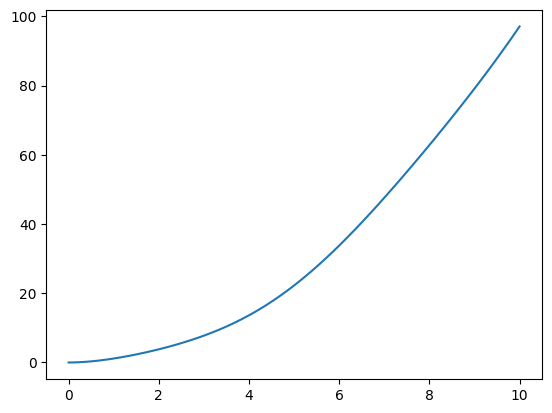

In [25]:
xs = np.linspace(0, 10, 100)
plt.plot(xs, f(xs))

## Скалярное произведение

In [45]:
# def scalar_mul(a, b):
#     import math
#     a = (a[0]**2 + a[1]**2)**(1/2)
#     print(a)
#     b = (b[0]**2 + b[1]**2)**(1/2)
#     print(b)
#     print(math.cos(a))
#     return a * b * math.cos(a)


In [4]:
def scalar_mul(a, b):
    result = 0
    for i in range(len(a)):
        result += a[i]*b[i]
    return result

In [7]:
# Example
x = np.array([1 ,2])
y = np.array([2, 0])
z = np.array([1, 1])
a = x + y
scalar_mul(a, z)

5

In [49]:
import numpy as np
import math
a = [2, -1]
b = [1, 3]
scalar_mul(a, b)

-1

In [ ]:
np.random.random()

## Матрицы

In [25]:
X = np.array([[1, 3, 1, -1], [2, -1, -1, 1], [2, -2, 1, 0]])
Y = np.array([[-1, 3, 0, 1], [0, 1, 3, 0], [2, -1, -2, 1]])
# print(X)
# print(Y)

# Посчитать сумму матриц
X+Y

array([[ 0,  6,  1,  0],
       [ 2,  0,  2,  1],
       [ 4, -3, -1,  1]])

In [24]:
X = np.array([[1, 3, 1, -1], [2, -1, -1, 1], [2, -2, 1, 0]])
Y = np.array([[-1, 3, 0, 1], [0, 1, 3, 0], [2, -1, -2, 1]])

# Посчитать произведение матриц, транспонируем матрицу Y
Yt = Y.T
M = X@Yt
M

array([[ 7,  6, -4],
       [-4, -4,  8],
       [-8,  1,  4]])

In [20]:
M = np.matmul(X, Yt)
M

array([[ 7,  6, -4],
       [-4, -4,  8],
       [-8,  1,  4]])

In [26]:
# Посчитать определитель полученной матрицы
np.linalg.det(M)

-311.9999999999998

In [27]:
# Посчитать произведение матриц, транспонируем матрицу X
X = np.array([[1, 3, 1, -1], [2, -1, -1, 1], [2, -2, 1, 0]])
Y = np.array([[-1, 3, 0, 1], [0, 1, 3, 0], [2, -1, -2, 1]])
Xt = X.T
M = Xt@Y
M

array([[ 3,  3,  2,  3],
       [-7, 10,  1,  1],
       [ 1,  1, -5,  2],
       [ 1, -2,  3, -1]])

In [29]:
# Посчитать определитель полученной матрицы
np.linalg.det(M)

0.0